In [1]:
from sympy import *
from sympy.plotting import plot

# Calculo de derivadas usando la funcion diff de sympy

Primero definimos que variables van a ser interpretadas como tales por sympy, y luego calculamos la derivada de $t^2$

In [2]:
t = symbols('t')
x = t**2
print(x)

t**2


In [3]:
# la derivada de la funcion x(t)
print(x)
dx = diff(t**2,t)
print(dx)
dx = diff(x,t)
print(dx)

t**2
2*t
2*t


Podemos definir nuestra funcion $x(t)$ y luego derivarla, incluso darle un nombre nuevo a la funcion derivada (por ejemplo dx).

Podemos ver por ejemplo que la derivada de:

$x(t) = t^n$

se puede calcular siempre como :

$\frac{dx}{dt} = n t^{n-1}$



In [4]:
x = t**3
dx = diff(x,t)
print('la funcion original: ' + str(x))
print('la funcion derivada: ' + str(dx))

la funcion original: t**3
la funcion derivada: 3*t**2


In [5]:
x = exp(3*t)
dx = diff(x,t)
print('la funcion: ', x)
print('su derivada: ', dx)

la funcion:  exp(3*t)
su derivada:  3*exp(3*t)


Podemos ver un ejemplo de la regla de la cadena que me dice que si tengo una una funcion compuesta de

$f(t)$ y $g(t)$

componer funciones es hacer 

$f(g(t))$


$x(t) = f(g(t))$

es igual a:

$\frac{dx}{dt} = \frac{df}{dg} \frac{dg}{dt}$

ejemplo

$f(t) = exp(t)$

$g(t) = 3*t$

$x(t) = exp(3*t)$

la derivada va a ser:

$\frac{dx}{dt} = exp(3t) 3$

In [6]:
x = exp(-t**2)
dx = diff(x,t)
print('la funcion original: ' + str(x))
print('la funcion derivada: ' + str(dx))

la funcion original: exp(-t**2)
la funcion derivada: -2*t*exp(-t**2)


Si queremos evaluar la funcion o la derivada en un valor particular tenemos que usar subs

In [7]:
print(x.subs(t,3))
print(dx.subs(t,3))

exp(-9)
-6*exp(-9)


Podemos probar aca derivar diferentes funciones de t

Podemos graficar una funcion y su derivada usando plot (de sympy no confundir con la de matplotlib)

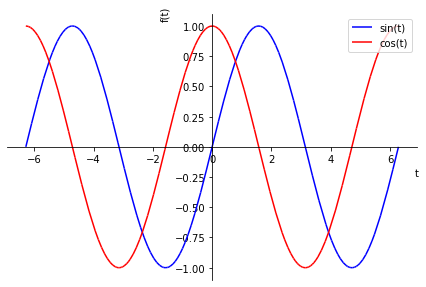

In [8]:
x = sin(t)
dx = diff(x,t)
tmin = -2*pi
tmax = 2*pi
p1 = plot(x,(t,tmin,tmax),line_color='blue',show=False,legend=x)
p2 = plot(dx,(t,tmin,tmax),line_color='red',show=False,legend=diff(x,t))
p1.append(p2[0])
p1.show()

Escribimos una funcion para graficar una funcion y su derivada en un punto, como la recta tangente. Notar que en lugar de x llamamos f de forma general a esa funcion que pasamos como argumento pero la variable de la funcion sigue siendo t que es la unica definida como tal al principio

In [9]:
def plotdiff(f, t, t0, tmin, tmax):
    '''Grafica la derivada de f(t) en el punto t=t0
    como recta con pendiente igual a la derivada en ese punto
    '''
    p1 = plot(f, (t,tmin,tmax), legend=f, show=False)
    df = diff(f,t)
    s = f.subs(t,t0) + df.subs(t,t0)*(t-t0)
    p2 = plot(s,(t,tmin,tmax), line_color = 'red', legend=s,show=False)
    p1.append(p2[0])
    return p1

Como ejemplo graficamos la derivada de $e^t$ en el punto t=1

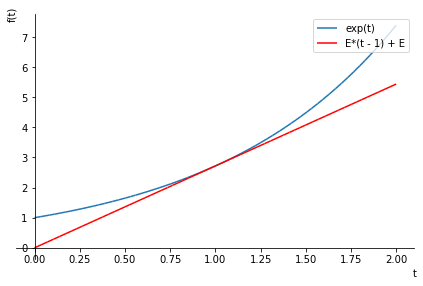

In [10]:
pp = plotdiff(exp(t),t,1,0,2)
pp.show()

In [11]:
b = symbols('b')
a = symbols('a')
x0 = symbols('x0')
x = (x0+b/a)*exp(a*t) - b/a
print('la solucion propuesta es: ' , x)
df = diff(x,t)
print(' la derivada es : ', df)
print('deberia ser igual al miembro derecho de la ED ', a*x+b)

la solucion propuesta es:  (x0 + b/a)*exp(a*t) - b/a
 la derivada es :  a*(x0 + b/a)*exp(a*t)
deberia ser igual al miembro derecho de la ED  a*((x0 + b/a)*exp(a*t) - b/a) + b


# Integracion numerica de ecuaciones diferenciales

In [12]:
from putils import *
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def lineal(t,x):
    return np.sin(x)

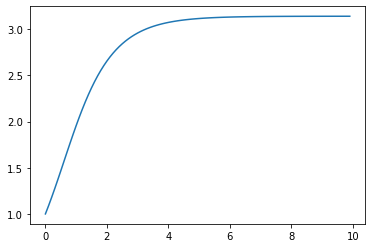

In [14]:
tmax = 10
dt = 0.1
xini = 1.0
t = np.arange(0, tmax, dt)
x = solve(lineal, t, [xini])
plt.plot(t,x)